## PCA in ML with Pytorch 

In this, the manual implementation and the sklearn implementation are both included

In [3]:
import pandas as pd


In [4]:
df_wine =pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',header=None)

In [5]:
df_wine.columns =['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']


In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values 
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Step 1:Data standardization**
We should standardize the X_test also using the fit from X_train

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


**Step 2: Constructing a covariance matrix** 

In [11]:
import numpy as np 

remember we calculate on the transpose, since `np.cov` calulate based on the input that the rows of the matrix are feaures

In [12]:
cov_mat = np.cov(X_train_std.T)

**Step 3: Decompose to eigenvalues and eigenvectors**


In [13]:
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.82894083, 2.52920254, 1.40778607, 0.97170248, 0.81772614,
       0.64269609, 0.53904343, 0.09124383, 0.16401706, 0.32677915,
       0.30227988, 0.22672631, 0.24405475])

now we have a `eig_val` variable consisiting of 13 eigenvalues sotred as 13x13 dimensional matrix `eigen_vecs`.

an alternative is that you can use the `np.linalg.eigh`, as it always return real eigen values

In [14]:
eigen_vecs

array([[ 0.12959991, -0.49807323,  0.1383815 , -0.24199813, -0.17279973,
        -0.17873289, -0.09000534, -0.08850175, -0.26402263, -0.48169166,
         0.43303897,  0.2793571 ,  0.11125519],
       [-0.24464064, -0.23168482, -0.08422378, -0.03501265,  0.58431883,
        -0.50041745, -0.44755409,  0.02912494,  0.05505047, -0.08986837,
        -0.18860336, -0.13627368, -0.14108829],
       [-0.01018912, -0.31496874, -0.63988217, -0.00978418, -0.26362755,
        -0.16064973,  0.06751248, -0.1213575 ,  0.01688933,  0.37909702,
        -0.0325249 ,  0.32898212, -0.35109208],
       [-0.24051579,  0.02321825, -0.62195017,  0.0922443 , -0.02622374,
         0.0559492 ,  0.24334226,  0.08600336, -0.05553175, -0.51955024,
        -0.13288449, -0.22277751,  0.36816801],
       [ 0.12649451, -0.25841951, -0.02997765,  0.82788074, -0.08753303,
         0.07810127, -0.30855505,  0.09468425,  0.06758476,  0.07256418,
         0.26176222, -0.13059365,  0.13263758],
       [ 0.38944115, -0.100684

**Step 4.1: Plotting the VAF**
Take a look at the corresponding Obsidian page for more information about variables and formulas.
- $p$: the sum of all eigen values (in this code named `tot`)
- We can get the *cummultive VAF* via the `np.cumsum` func

In [15]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse = True)]
cum_var_exp =np.cumsum(var_exp)

Plotting it out

In [16]:
import matplotlib.pyplot as plt

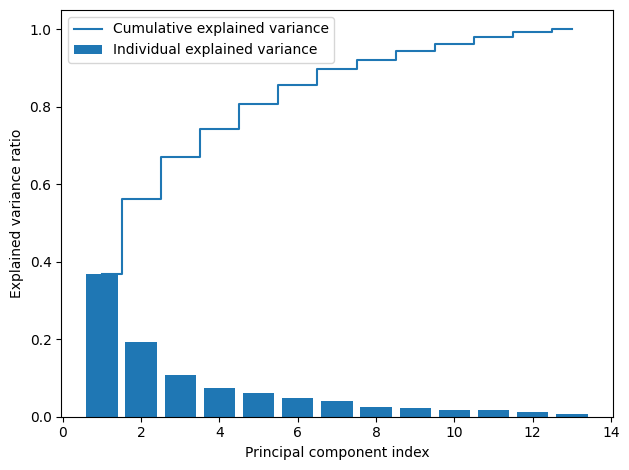

In [17]:
plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Step 5: Sorting decreasing order of the eigenvalues**

We make tuples : () of (eigen value,eigen vector) and then make a list out of it


In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]


Sort the eigen pairs from high to low

In [19]:
eigen_pairs.sort(key =lambda k :k[0],reverse= True)
# This just takes the first element of the tuple as the key to compare. This function is just saying compare elements by the eiggen_vals.

**Step 6: Constructing a projection matrix $W$ from the top $k$ eigenvects**

Note that two eigenvectors have been chosen for the purpose of illustration, since we are going to plot the data via a two-dimensional scatterplot later in this subsection. In practice, the number of principal components has to be determined by a tradeoff between computational efficiency and the performance of the classifier:

In [20]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.12959991 -0.49807323]
 [-0.24464064 -0.23168482]
 [-0.01018912 -0.31496874]
 [-0.24051579  0.02321825]
 [ 0.12649451 -0.25841951]
 [ 0.38944115 -0.1006849 ]
 [ 0.42757808 -0.02097952]
 [-0.30505669 -0.0399057 ]
 [ 0.30775255 -0.06746036]
 [-0.11027186 -0.53087111]
 [ 0.30710508  0.27161729]
 [ 0.37636185  0.16071181]
 [ 0.2811085  -0.36547344]]


**Step 7:Transform $d$ dimension input dataset X using $W$ to obtain $k$ new dimension features**

$$x′ = xW$$


In [21]:
X_train_pca = X_train_std.dot(w)

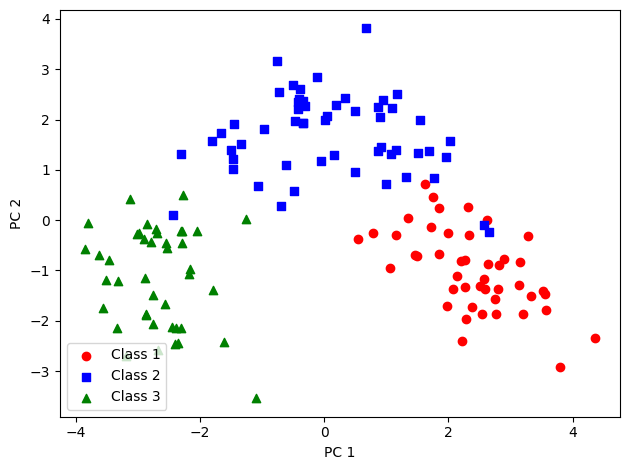

In [22]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## PCA IN SKLEARN

In [23]:
from plot_decision_regions import plot_decision_regions

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 


In [25]:
pca=PCA(n_components=2)

In [26]:
lr=LogisticRegression(multi_class='ovr',random_state = 1, solver = 'lbfgs')

In [27]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Now we fit the log model on the reduced dataset

In [28]:
lr.fit(X_train_pca,y_train)

/opt/anaconda3/envs/islp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=1)

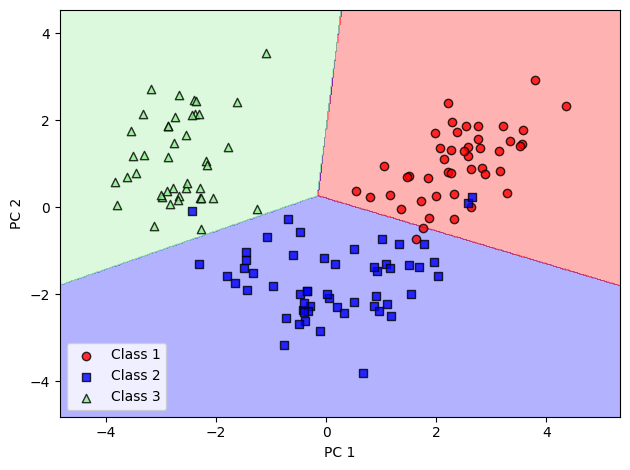

In [29]:
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

We can look at the explained variance ratio (also called VAF) through `n_components` and the method `.explained_variance_ratio`

In [30]:
pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

## Assessing feature combination ( for our own implementation)

Again, visit the PCA obsidian page to know ber, but to find the loadig we multy the eigen vector, or loading factor, to the square root of eigenvalue


In [31]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
loadings

array([[ 0.28479388, -0.7921091 ,  0.16418988, -0.23854959, -0.1562597 ,
        -0.14328717, -0.06608154, -0.02673336, -0.10692658, -0.27535711,
         0.23808476,  0.13301808,  0.05496218],
       [-0.53759417, -0.36845918, -0.09993165, -0.03451371,  0.52838907,
        -0.40117631, -0.32859232,  0.00879765,  0.0222949 , -0.0513729 ,
        -0.1036941 , -0.06488778, -0.06970029],
       [-0.02239044, -0.50090949, -0.75922123, -0.00964475, -0.23839368,
        -0.1287902 ,  0.04956738, -0.03665797,  0.00684001,  0.21670929,
        -0.01788219,  0.15664742, -0.17344615],
       [-0.52852987,  0.03692507, -0.73794488,  0.09092979, -0.02371366,
         0.04485354,  0.17866086,  0.02597868, -0.02248981, -0.29699881,
        -0.07305987, -0.10607726,  0.18188199],
       [ 0.27796981, -0.4109766 , -0.03556853,  0.81608319, -0.07915456,
         0.06261248, -0.22653981,  0.02860089,  0.02737117,  0.04148103,
         0.14391683, -0.06218319,  0.06552548],
       [ 0.85579113, -0.160123

Now lets plot the loading for the first component

In [32]:
df_wine.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

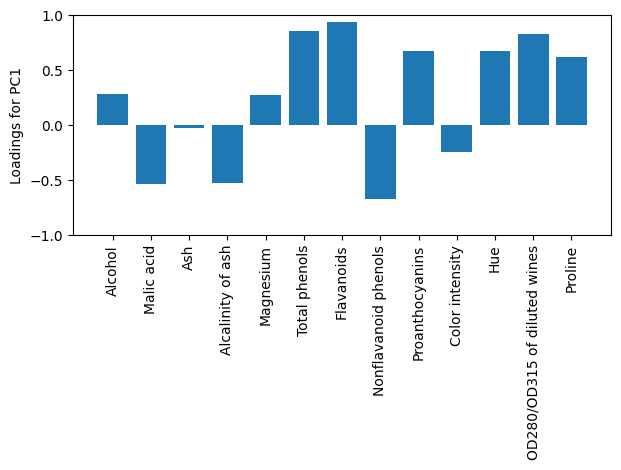

In [33]:
fig, ax = plt.subplots() # Create a figure named fig with axes ax
ax.bar(range(13),loadings[:,0])
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],rotation = 90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

## Assessing feature combination with sklearn

THe loading factor/components/eigenvector can be accessed throug `pca.component` and eigenvalues through `explained_varience`

In [34]:
sklearn_loadings =pca.components_.T * np.sqrt(pca.explained_variance_)

The plotting is the same

## LDA
Visit the obsidian page for more information about steps and procedures

**Step 1: Standardize**: We have already standardize the variables before.

**Step 2: Calc the mean vectors for each class**: 

In [35]:
np.mean(X_train_std[y_train==2])

-0.20723621775717768

In [36]:
mean_vecs = []
for i in range (1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==i], axis = 0))
mean_vecs 

[array([ 0.91978353, -0.30745801,  0.31170497, -0.77070128,  0.3570667 ,
         0.94244036,  1.08126971, -0.61091043,  0.5657055 ,  0.19023193,
         0.5023533 ,  0.82020082,  1.19673935]),
 array([-0.89419108, -0.4180267 , -0.46748599,  0.22143613, -0.29257833,
        -0.07476381,  0.03134406, -0.05767259,  0.10113134, -0.89096913,
         0.46438407,  0.29201464, -0.70869344]),
 array([ 1.85482156e-01,  8.76835219e-01,  2.78214421e-01,  5.35775485e-01,
         5.66825020e-04, -9.11852530e-01, -1.19954906e+00,  7.30070523e-01,
        -7.38546934e-01,  9.62925373e-01, -1.14635768e+00, -1.26118672e+00,
        -3.54169803e-01])]

**Step 3: Calculate the scatter matrix using the mean vectors**

what `zip` does:
```py
a = [1, 2, 3]
b = ['a', 'b', 'c']

zipped = zip(a, b)
print(list(zipped))

>>> [(1, 'a'), (2, 'b'), (3, 'c')]
```

We can calculate the within scatter matrix with the following formula:

$$\mathbf{S}_i = \sum_{\mathbf{x} \in D_i} (\mathbf{x} - \mathbf{m}_i)(\mathbf{x} - \mathbf{m}_i)^T
$$


What we want is to reshape each feature in each class as a 13x1 matrix. That will be our X.

We must also make our mean vecotr $m$ the same dimensions 13x1.

In [37]:
## Create a 13x13 feature matrix
d =13
S_W = np.zeros((d,d))


In [38]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter      

To understand the code above better, the code below is a more beginners way of understanding it.

In [39]:
for i in range(len(mean_vecs)):  # Iterate by index
    label = i + 1               # Labels start from 1
    mv = mean_vecs[i]           # Get the corresponding mean vector
    
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

As LDA assume that there is class balance. Lets check

In [40]:
np.bincount(y_train)[1:]

array([45, 55, 42])

It is not balance, therefore we have to balance it before we sum them in the scatter matrix,

The standardization process is the covariance matrix of the within scatter( check obsidian)

In [41]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    
print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


**Between class** 

In [42]:
X_train_std[y_train == 0+ 1, :].shape ## with output =1, how many rows and cols there are with X?

(45, 13)

In [43]:
d=13
mean_overall = np.mean(X_train_std, axis =0)
mean_overall = mean_overall.reshape(d,1)

S_B = np.zeros((d, d))
for index, mean_vect in enumerate(mean_vecs):
    number_of_rows = X_train_std[y_train == i + 1, :].shape[0]
    mean_vect = mean_vect.reshape(d,1)
    S_B += number_of_rows * (mean_vect - mean_overall).dot((mean_vect - mean_overall).T)

**Step 4: Compute eigenvectors and eigen values** 

This is similar to step 4 of the PCA, where we use `np.linalg.eig`. But now since the formula is $S^{-1}_w s_b$ , we calc the inverse of S_w with `np.linalg.inv`

In [44]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

**Step 5: Sort eigenvalues by decreasing order to rank eigenvectors** 

In [45]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

527.9323747374027
157.40470896946513
2.842170943040401e-14
2.2740333372628154e-14
2.2740333372628154e-14
2.2088138860023642e-14
2.2088138860023642e-14
2.0533991290639856e-14
1.655708834569288e-14
1.1275826437594417e-14
7.150076935460928e-15
5.535816947889969e-15
5.535816947889969e-15


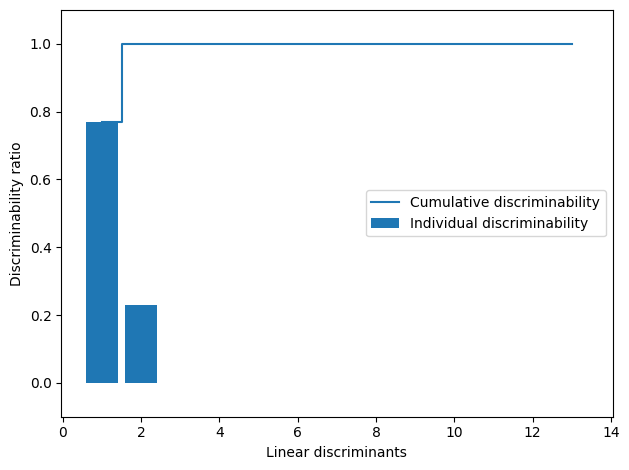

In [46]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center',
        label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Step 7: Construct projection matrix $W$ with $d*k$ dimensions from the top $k$ eigenvects. The eigenvects are the columns of this matrix** 

In [47]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.07812704 -0.39764365]
 [ 0.06821788 -0.23302249]
 [-0.02662948 -0.38050635]
 [ 0.16015822  0.32754323]
 [ 0.00476554 -0.00690566]
 [ 0.22022184  0.08330355]
 [-0.78984122  0.0775322 ]
 [-0.09052123  0.03677252]
 [ 0.06331374  0.20702682]
 [ 0.20428041 -0.31021184]
 [-0.05727987  0.22829543]
 [-0.3755674   0.01705694]
 [-0.30372375 -0.57415898]]


**Step 8: Projecting examples to a new feature space**

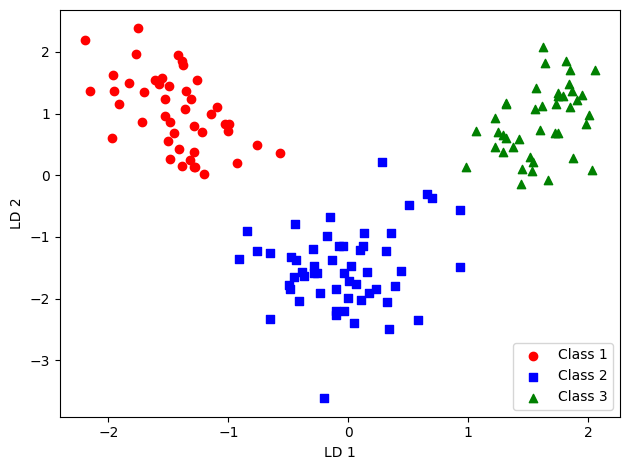

In [48]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# LDA in sklearn

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [55]:
lda = LinearDiscriminantAnalysis(n_components =2)
X_train_lda = lda.fit_transform(X_train_std,y_train)

In [52]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr =LogisticRegression(random_state=1, solver = 'lbfgs')
lr = lr.fit(X_train_lda,y_train)

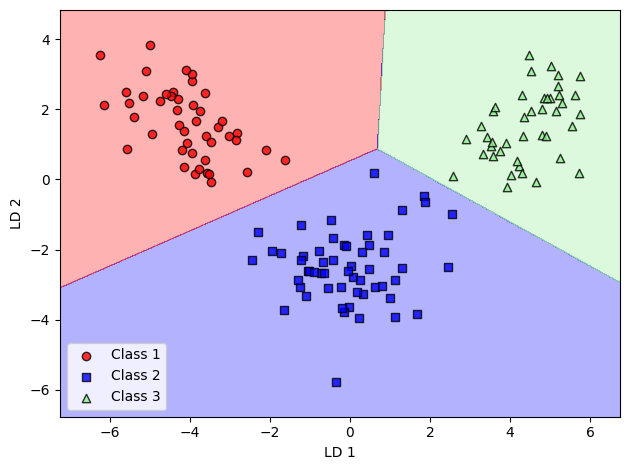

In [57]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

Lets look at the test set

In [58]:
X_test_lda = lda.transform(X_test_std)

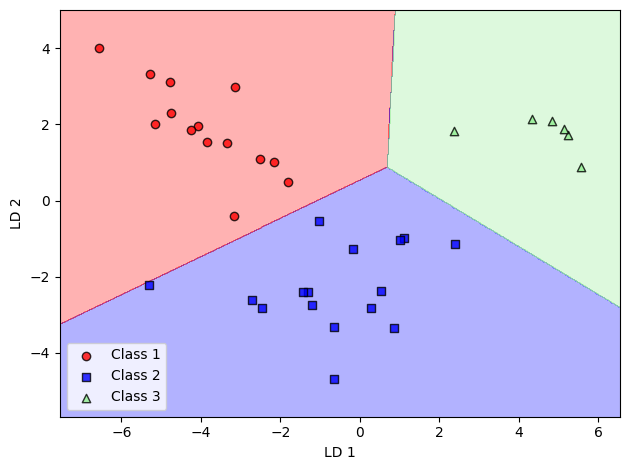

In [59]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_10.png', dpi=300)
plt.show()